# Figures 3, 5, & S4

Neurophysiological differentiation results

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

import analysis

In [2]:
OUTPUT_DIR = Path('figures')

## Load data

In [3]:
main = pd.read_parquet('results/main.parquet')

In [4]:
mean_centroid_distance = pd.read_parquet('results/mean_centroid_distance.parquet')

## Plotting function

In [5]:
def plot_differences(data, response, a, b, output_dir, tick_spacing=None):
    # Compute differences
    differences = analysis.compute_difference(
        data,
        response,
        a=a,
        b=b,
        op="mean",
        groups=("stimulus_type", "session"),
    )

    # Plot
    for x in ["layer", "area"]:
        print(f"  Plotting {x}")
        fig, ax = analysis.boxplot(
            data=differences,
            x=x,
            y="difference",
            width=5,
            height=5,
            hline=0.0,
        )
        if tick_spacing is not None:
            ax.yaxis.set_major_locator(plt.MultipleLocator(tick_spacing))
        analysis.savefig(fig, output_dir / f"nd_differences__by_{x}.png")

    print("  Plotting layer/area")
    fig, axes, grid = analysis.faceted_plot(
        data=differences,
        y="difference",
        row="layer",
        col="area",
        box=False,
        mean=True,
        height=3,
        aspect=0.55,
        hline=0,
        s=8,
    )
    if tick_spacing is not None:
        ax.yaxis.set_major_locator(plt.MultipleLocator(tick_spacing))
    analysis.savefig(fig, output_dir / "nd_differences__by_layer-area.png")

## Figure 3

In [6]:
response = 'log(normalized differentiation)'

In [7]:
# Unscrambled vs. scrambled stimuli

subset_fig3 = (
    main
    .loc[main["stimulus_is_scrambled_pair"]]
    .copy()
)
subset_fig3["stimulus_type"] = subset_fig3["stimulus_type"].map(
    dict(
        natural="unscrambled",
        artificial="scrambled",
    )
)
subset_fig3.shape

(2200, 28)

In [8]:
output_dir = OUTPUT_DIR / "fig-3"

Averaging over 2200 values
  Plotting layer
  Plotting area
  Plotting layer/area


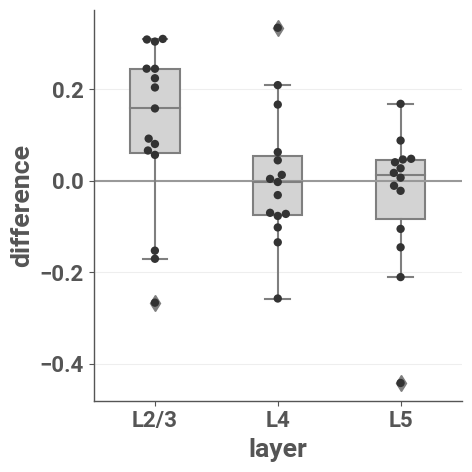

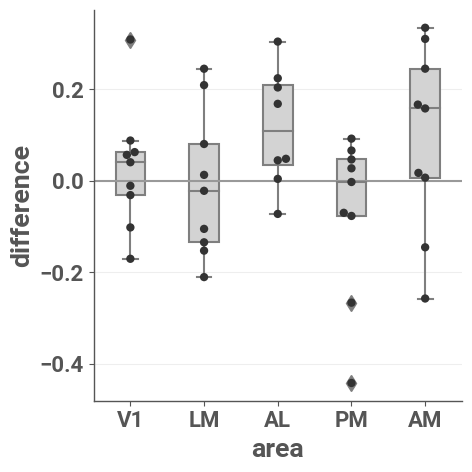

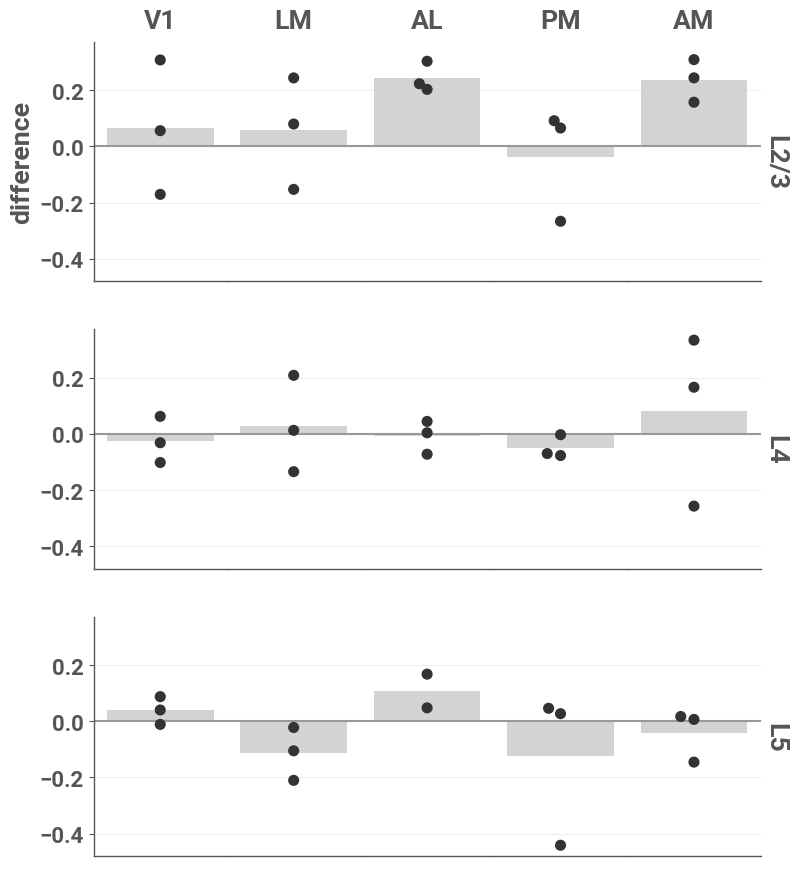

In [9]:
plot_differences(
    subset_fig3,
    response,
    a="unscrambled",
    b="scrambled",
    output_dir=output_dir,
)

## Figure 5

In [10]:
response = 'log(mean_centroid_distance)'

In [11]:
# Unscrambled vs. scrambled stimuli

subset_fig5 = (
    mean_centroid_distance
    .loc[mean_centroid_distance["stimulus_is_scrambled_pair"]]
    .copy()
)
subset_fig5["stimulus_type"] = subset_fig5["stimulus_type"].map(
    dict(
        natural="unscrambled",
        artificial="scrambled",
    )
)
subset_fig5.shape

(2200, 27)

In [12]:
output_dir = OUTPUT_DIR / "fig-5"

Averaging over 2200 values
  Plotting layer
  Plotting area
  Plotting layer/area


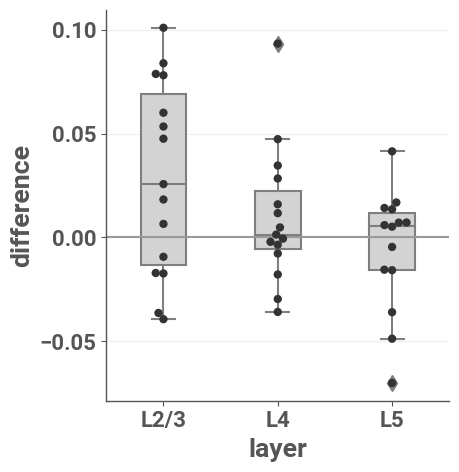

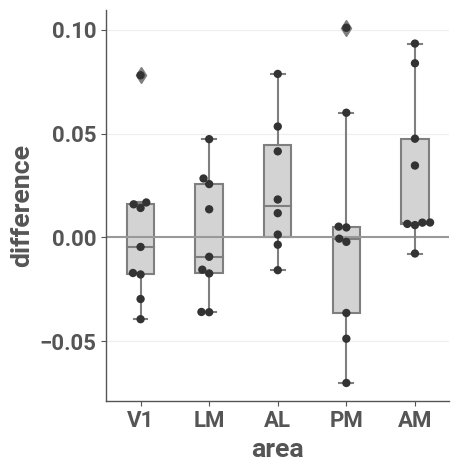

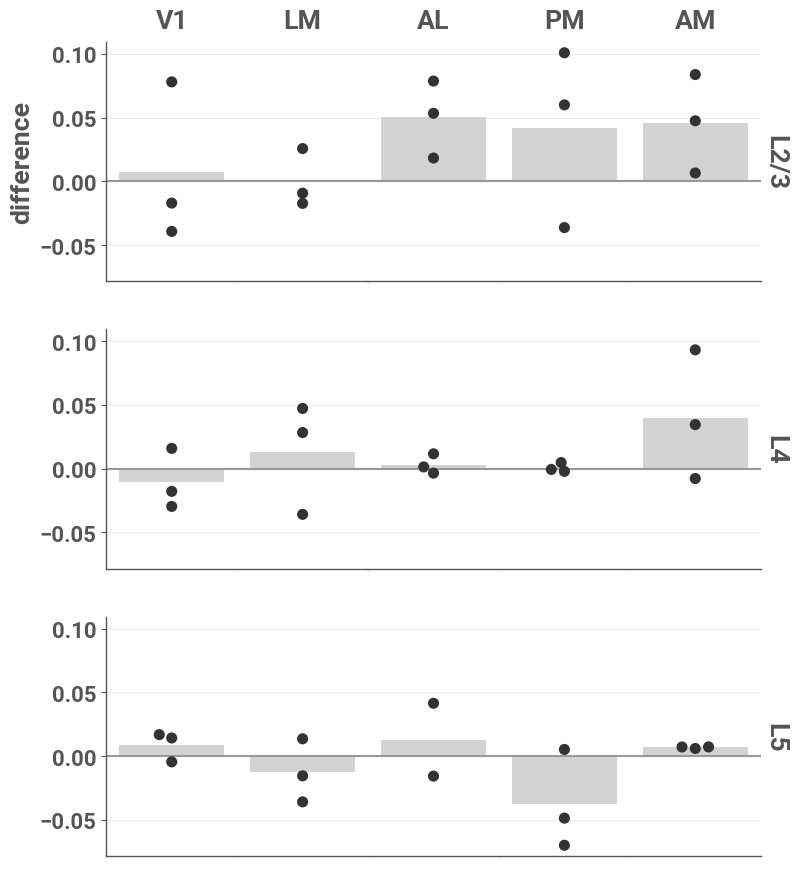

In [13]:
plot_differences(
    subset_fig5,
    response,
    a="unscrambled",
    b="scrambled",
    output_dir=output_dir,
    tick_spacing=0.05,
)

## Figure S4

In [14]:
response = 'log(normalized differentiation)'

In [15]:
# Select all 12 stimuli presented in the block design
subset_s4fig = main.loc[
    main['stimulus_is_block']
]
subset_s4fig.shape

(5280, 28)

In [16]:
output_dir = OUTPUT_DIR / "fig-s4"

Averaging over 5280 values
  Plotting layer
  Plotting area
  Plotting layer/area


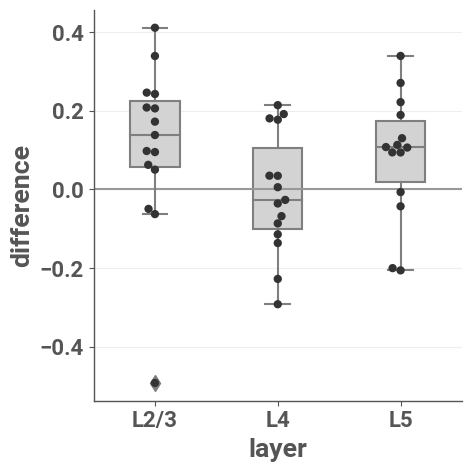

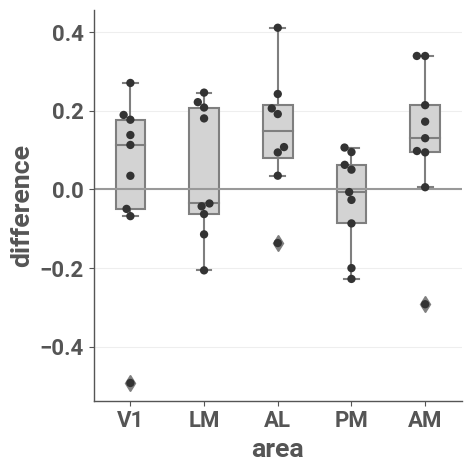

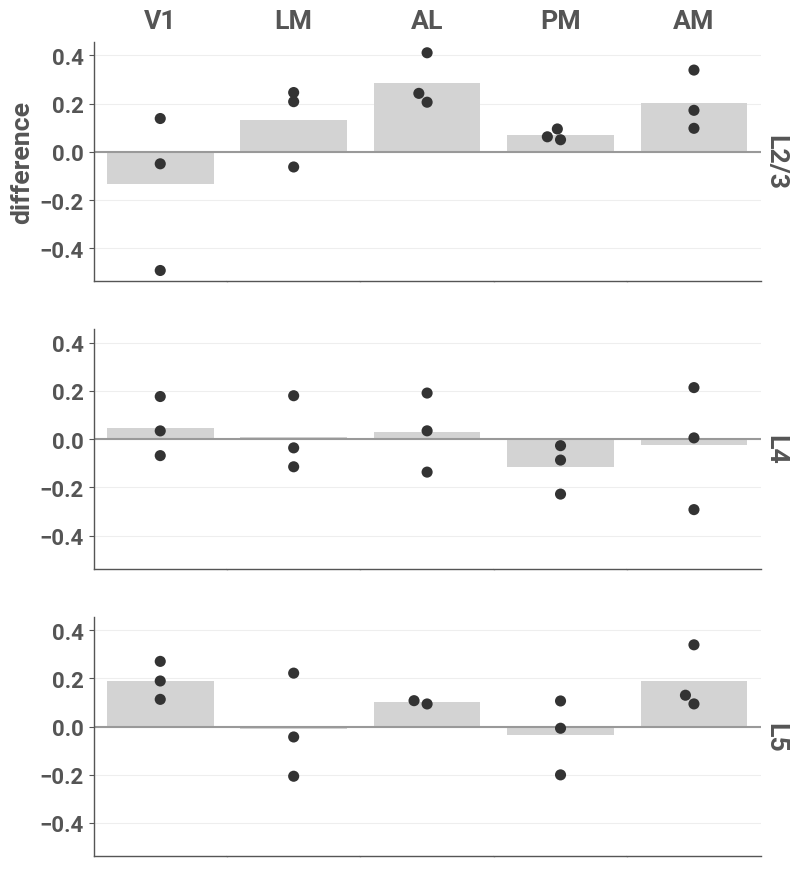

In [17]:
plot_differences(
    subset_s4fig,
    response,
    a="natural",
    b="artificial",
    output_dir=output_dir,
)